In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf 
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

2022-05-28 11:37:17.589440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-28 11:37:17.589476: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
def encodeDNA(string):
    #string list 형태로 전달받습니다. 
    # list 형태를  join으로 문자혈로 바꿉니다. 
    dnastring="".join(string)
    my_array = np.array(list(dnastring))
    #encoding file 형태 1600 * 4
    onehot_encode = np.zeros((1600,4), dtype=int)
    base_dict = {'A':0, 'C':1, 'G':2, 'T':3}
    
    # R, Y, S, K 등 ACGT 외 IUPAC nutcloetide code 적용
    # 둘다 1로 하는 이유 : or 관계 이기 때문에 
    for i in range(len(my_array)):
        if my_array[i] == 'R':
            onehot_encode[i, 0]=1
            onehot_encode[i, 2]=1
            continue
        
        if my_array[i] == 'Y':
            onehot_encode[i, 1]=1
            onehot_encode[i, 3]=1
            continue    
        if my_array[i] == 'S':
            onehot_encode[i, 1]=1
            onehot_encode[i, 2]=1
            continue
        if my_array[i] == 'W':
            onehot_encode[i, 0]=1
            onehot_encode[i, 3]=1
            continue
        
        if my_array[i] == 'K':
            onehot_encode[i, 2]=1
            onehot_encode[i, 3]=1
            continue
        
        if my_array[i] == 'M':
            onehot_encode[i, 0]=1
            onehot_encode[i, 1]=1
            continue
        
        if my_array[i] == 'B':
            onehot_encode[i, 1]=1
            onehot_encode[i, 2]=1
            onehot_encode[i, 3]=1
            continue
        
        if my_array[i] == 'D':
            onehot_encode[i, 0]=1
            onehot_encode[i, 2]=1
            onehot_encode[i, 3]=1
            continue
        
        if my_array[i] == 'H':
            onehot_encode[i, 0]=1
            onehot_encode[i, 1]=1
            onehot_encode[i, 3]=1
            continue
        
        if my_array[i] == 'V':
            onehot_encode[i, 0]=1
            onehot_encode[i, 1]=1
            onehot_encode[i, 2]=1
            continue
        
        if my_array[i] == 'N':
            continue
        
        onehot_encode[i, base_dict[my_array[i]]]=1
        
    return onehot_encode

In [21]:
import time
start = time.time()
f = open('data/deletecoma.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
cnt = 0
datax = []
for line in rdr:
    if cnt == 8424:
        break
    temp = encodeDNA(line)
    temp_reshape = temp.reshape(-1,1600,4)
    if cnt == 0: 
        datax = temp
        cnt = cnt + 1
    elif cnt == 1:
        datax = np.stack((datax, temp), axis=0)
        cnt = cnt + 1
    else:
        datax = np.append(datax,temp_reshape, axis=0)
        cnt = cnt + 1
print("time :", time.time() - start)
print(datax)
f.close()    

time : 255.93201446533203
[[[0 1 0 0]
  [0 1 0 0]
  [1 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1 0 0 0]
  [1 0 0 0]
  [1 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 1 0 0]
  [1 0 0 0]
  [1 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[1 0 0 0]
  [0 1 0 0]
  [0 0 0 1]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1 0 0 0]
  [0 1 0 0]
  [0 0 0 1]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1 0 0 0]
  [0 1 0 0]
  [0 0 0 1]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [22]:
np.save('data11.npy',datax)

In [23]:
datax = np.load(join('data', 'data11.npy'))
print(datax.shape)

(8424, 1600, 4)


In [2]:
datay = np.zeros((10000,1), dtype=int)

In [3]:
np.save('0label_random.npy',datay)

In [4]:
datay

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [5]:
datay.shape

(10000, 1)

In [8]:
#전체학습
data01 = np.load(join('data', 'data01.npy'))
label1 = np.load(join('data', '1label.npy'))
data02 = np.load(join('data', 'PsaaData01.npy'))
label0 = np.load(join('data', '0label_psaa.npy'))
data03 = np.load(join('data','RandomData01.npy'))
label01= np.load(join('data','0label_random.npy'))

In [10]:
datax = np.append(data01,data02, axis=0)
datax = np.append(datax,data03, axis=0)
print(datax.shape)
datay = np.append(label1,label0, axis=0)
datay = np.append(datay,label01, axis=0)
print(datay.shape)

(26251, 1600, 4)
(26251, 1)


In [11]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size = 0.3, random_state = 111)

In [10]:
print(trnx.shape)
print(trny.shape)

(18375, 1600, 4)
(18375, 1)


In [13]:
input_shape = (1600, 4, 1)

input_tensor = layers.Input(shape = input_shape)

conv1_1 = layers.Conv2D(400, (4,4), padding = 'same')(input_tensor)
conv1_2 = layers.BatchNormalization()(conv1_1)
conv1_3 = layers.Activation("relu")(conv1_2)
conv1_4 = layers.MaxPooling2D((2,2))(conv1_3)

conv2_1 = layers.Conv2D(1600, (2,2), padding = 'same')(conv1_4)
conv2_2 = layers.BatchNormalization()(conv2_1)
conv2_3 = layers.Activation("relu")(conv2_2)
conv2_4 = layers.Dropout(0.2)(conv2_3)

flatted = layers.Flatten()(conv2_4)

dense1 = layers.Dense(64, activation = 'relu')(flatted)
dense2 = layers.Dense(32, activation = 'relu')(dense1)
output_class = layers.Dense(1, activation = "softmax")(dense2)

cnn_fmodel = models.Model(input_tensor, output_class)
cnn_fmodel.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
input_shape = (1600, 4, 1)

input_tensor = layers.Input(shape = input_shape)

flatted = layers.Flatten()(input_tensor)
hidden1 = layers.Dense(800, activation='relu')(flatted)
hidden2 = layers.Dense(1000, activation='relu')(hidden1)
hidden3 = layers.Dense(500, activation='relu')(hidden2)
output = layers.Dense(1, activation='softmax')(hidden3)

mlp_function = models.Model(input_tensor, output)

mlp_function.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1600, 4, 1)]      0         
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_3 (Dense)             (None, 800)               5120800   
                                                                 
 dense_4 (Dense)             (None, 1000)              801000    
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 1)                 501       
                                                                 
Total params: 6,422,801
Trainable params: 6,422,801
Non-tra

In [16]:
mlp_function.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = mlp_function.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 10)

Epoch 1/10


2022-05-25 16:40:39.167803: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 470400000 exceeds 10% of free system memory.


1836/1838 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.6093

2022-05-25 16:41:11.823128: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 201625600 exceeds 10% of free system memory.


1838/1838 [==============================] - 34s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6094 - val_loss: 0.0000e+00 - val_accuracy: 0.6098
Epoch 2/10
1838/1838 [==============================] - 32s 17ms/step - loss: 0.0000e+00 - accuracy: 0.6094 - val_loss: 0.0000e+00 - val_accuracy: 0.6098
Epoch 3/10
1838/1838 [==============================] - 34s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6094 - val_loss: 0.0000e+00 - val_accuracy: 0.6098
Epoch 4/10
1687/1838 [==========================>...] - ETA: 2s - loss: 0.0000e+00 - accuracy: 0.6109

KeyboardInterrupt: 

In [14]:
cnn_fmodel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1600, 4, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1600, 4, 400)      6800      
                                                                 
 batch_normalization_4 (Batc  (None, 1600, 4, 400)     1600      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 1600, 4, 400)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 800, 2, 400)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 800, 2, 1600)      2561

In [15]:
history = cnn_fmodel.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 10)

Epoch 1/10
1838/1838 [==============================] - 1706s 928ms/step - loss: 0.0000e+00 - accuracy: 0.6094 - val_loss: 0.0000e+00 - val_accuracy: 0.6098
Epoch 2/10
1838/1838 [==============================] - 1699s 924ms/step - loss: 0.0000e+00 - accuracy: 0.6094 - val_loss: 0.0000e+00 - val_accuracy: 0.6098
Epoch 3/10
 975/1838 [==============>...............] - ETA: 12:14 - loss: 0.0000e+00 - accuracy: 0.6149

KeyboardInterrupt: 

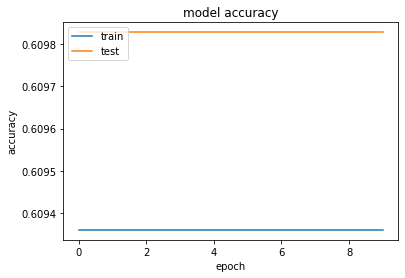

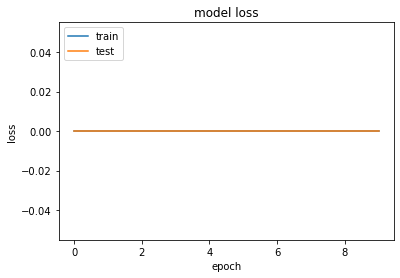

0.6098273396492004
0.6098273396492004


In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))

In [12]:
#오토인코더용데이터
data01 = np.load(join('data', 'data11.npy'))
print(data01.shape)
datax = data01.reshape([-1, 1600, 4, 1])
print(datax.shape)

(8424, 1600, 4)
(8424, 1600, 4, 1)


In [21]:
#input
input_shape = (1600*4,)
input_tensor = layers.Input(input_shape)

#encoder
encoder1 = layers.Dense(1600, activation='relu')(input_tensor)
encoder2 = layers.Dense(800, activation='relu')(encoder1)
encoder3 = layers.Dense(400, activation='relu')(encoder2)
encoder4 = layers.Dense(200, activation='relu')(encoder3)

latent_tensor = encoder4

##eecoder
decoder1 = layers.Dense(400, activation="relu")(latent_tensor)
decoder2 = layers.Dense(800, activation="relu")(decoder1)
decoder3 = layers.Dense(1600, activation="relu")(decoder2)
#Outputs
reconstruction_output = layers.Dense(1600*4, activation='relu')(decoder3) 

In [22]:
ae = models.Model(input_tensor, reconstruction_output)
ae.compile(optimizer = 'Adam', loss = 'mse')
ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6400)]            0         
                                                                 
 dense_6 (Dense)             (None, 1600)              10241600  
                                                                 
 dense_7 (Dense)             (None, 800)               1280800   
                                                                 
 dense_8 (Dense)             (None, 400)               320400    
                                                                 
 dense_9 (Dense)             (None, 200)               80200     
                                                                 
 dense_10 (Dense)            (None, 400)               80400     
                                                                 
 dense_11 (Dense)            (None, 800)               3208

In [25]:
## input
input_shape = (1600, 4, 1)
input_tensor = layers.Input(input_shape)

## encoder
conv1 = layers.Conv2D(1, (4,4), padding='same', activation='relu')(input_tensor)
pooling1 = layers.MaxPool2D(name='imlatent_layer')(conv1)

flatten1 = layers.Flatten()(pooling1)
dense1  = layers.Dense(800, activation = 'relu', name = 'latent_layer')(flatten1)

latent_tensor = dense1

## Decoding

dense2 = layers.Dense(1600, activation = 'relu')(latent_tensor)
reshaped = tf.reshape(dense2, [-1,800,2,1])

upsample2 = layers.UpSampling2D()(reshaped)
deconv2 = layers.Conv2DTranspose(1, (4,4), padding = 'same', activation='sigmoid')(upsample2 )

#outputs
output_tensor = deconv2

2022-05-28 11:03:02.754582: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-28 11:03:02.754608: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (questionnote): /proc/driver/nvidia/version does not exist
2022-05-28 11:03:02.755583: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
ae = models.Model(input_tensor, output_tensor)
ae.compile(optimizer = 'Adam', loss = 'mse')
ae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1600, 4, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 1600, 4, 1)        17        
                                                                 
 imlatent_layer (MaxPooling2  (None, 800, 2, 1)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 latent_layer (Dense)        (None, 800)               1280800   
                                                                 
 dense (Dense)               (None, 1600)              1281600   
                                                           

In [13]:
#외부 모델 호출
ae = tf.keras.models.load_model('caeDNA10.h5')
ae.compile(optimizer = 'Adam', loss = 'mse')
ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1600, 4, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 1600, 4, 1)        17        
                                                                 
 imlatent_layer (MaxPooling2  (None, 800, 2, 1)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 latent_layer (Dense)        (None, 800)               1280800   
                                                                 
 dense_2 (Dense)             (None, 1600)              1281600   
                                                           

In [14]:
epoch = 10
batch_size = 1024
ae.fit(datax, datax, batch_size =batch_size, epochs = epoch, verbose = 2)

Epoch 1/10
9/9 - 3s - loss: 0.0948 - 3s/epoch - 333ms/step
Epoch 2/10
9/9 - 3s - loss: 0.0923 - 3s/epoch - 280ms/step
Epoch 3/10
9/9 - 3s - loss: 0.0912 - 3s/epoch - 281ms/step
Epoch 4/10
9/9 - 3s - loss: 0.0905 - 3s/epoch - 280ms/step
Epoch 5/10
9/9 - 3s - loss: 0.0900 - 3s/epoch - 284ms/step
Epoch 6/10
9/9 - 3s - loss: 0.0896 - 3s/epoch - 279ms/step
Epoch 7/10
9/9 - 3s - loss: 0.0892 - 3s/epoch - 279ms/step
Epoch 8/10
9/9 - 3s - loss: 0.0889 - 3s/epoch - 281ms/step
Epoch 9/10
9/9 - 3s - loss: 0.0887 - 3s/epoch - 281ms/step
Epoch 10/10
9/9 - 3s - loss: 0.0885 - 3s/epoch - 278ms/step


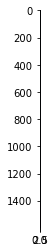

In [15]:
plt.imshow(datax[0].reshape(1600,4))

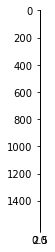

In [16]:
#데이터를 모델에 넣고 복원
decoded_img = ae.predict(datax[100].reshape(1, 1600, 4, 1))
decoded_img = decoded_img.reshape(1600,4)

#복원된 데이터 확인
plt.imshow(decoded_img)

In [18]:
#novelty detector
np.mean(np.abs(datax[100] - decoded_img.reshape(1600,4,1)))

## its mean is error accuring when the model reconstructs data

0.1529755119357956

In [19]:
random_vector = np.random.rand(1600,4)

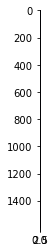

In [20]:
#데이터를 모델에 넣고 복우너시킵니다.
decoded_img = ae.predict(random_vector.reshape(-1,1600,4,1))
decoded_img = decoded_img.reshape(1600, 4)

#복원된 데이터 확인
plt.imshow(decoded_img)

In [23]:
np.mean(np.abs(random_vector - decoded_img.reshape(1600,4)))

0.43458052409792863

In [24]:
ae.save("caeDNA11.h5")

In [25]:
#final test
data02 = np.load(join('data', 'PsaaData01.npy'))
print(data02.shape)
dataPsaa = data02.reshape([251, 1600*4])
print(dataPsaa.shape)

(251, 1600, 4)
(251, 6400)


In [31]:
decoded_img = ae.predict(dataPsaa[10].reshape(1, 1600,4))
decoded_img = decoded_img.reshape(1600, 4)
np.mean(np.abs(dataPsaa[100] - decoded_img.reshape(1600,4,1)))

0.29152825306061575

In [28]:
data03 = np.load(join('data', 'data01.npy'))
print(data03.shape)
dataTrained = data03.reshape([16000, 1600,4])
print(dataTrained.shape)

(16000, 1600, 4)
(16000, 1600, 4)


In [30]:
decoded_img = ae.predict(dataTrained[100].reshape(1, 1600,4))
decoded_img = decoded_img.reshape(1600, 4)
np.mean(np.abs(dataTrained[100] - decoded_img.reshape(1600,4)))

0.1708721050355613